## Preprocessing

In [3]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import pickle

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dla-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [6]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME'])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [7]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [8]:
# Look at APPLICATION_TYPE value counts for binning
application_df['APPLICATION_TYPE'].value_counts().to_dict()

{'T3': 27037,
 'T4': 1542,
 'T6': 1216,
 'T5': 1173,
 'T19': 1065,
 'T8': 737,
 'T7': 725,
 'T10': 528,
 'T9': 156,
 'T13': 66,
 'T12': 27,
 'T2': 16,
 'T25': 3,
 'T14': 3,
 'T29': 2,
 'T15': 2,
 'T17': 1}

In [9]:
# Choose a cutoff value of 500 and create a list of application types to be replaced
all_app_types = application_df['APPLICATION_TYPE'].value_counts().to_dict()
application_types_to_replace = [i for i in all_app_types.keys() if all_app_types[i] < 500]

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [10]:
# Look at CLASSIFICATION value counts for binning
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [11]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
all_class_types = application_df['CLASSIFICATION'].value_counts().to_dict()
classifications_to_replace = [i for i in all_class_types.keys() if all_class_types[i] < 1000]

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [12]:
# Get all categorical data columns into a list
dummies_cols = []

cols = application_df.columns
typs = application_df.dtypes.values

for c in range(len(cols)):
    if (typs[c] == 'object'):
        dummies_cols.append(cols[c])

# Convert categorical data to numeric with `pd.get_dummies`
dummies_df = pd.get_dummies(application_df[dummies_cols])

dummies_df.columns

Index(['APPLICATION_TYPE_Other', 'APPLICATION_TYPE_T10',
       'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3', 'APPLICATION_TYPE_T4',
       'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6', 'APPLICATION_TYPE_T7',
       'APPLICATION_TYPE_T8', 'AFFILIATION_CompanySponsored',
       'AFFILIATION_Family/Parent', 'AFFILIATION_Independent',
       'AFFILIATION_National', 'AFFILIATION_Other', 'AFFILIATION_Regional',
       'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200', 'CLASSIFICATION_C2000',
       'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000', 'CLASSIFICATION_Other',
       'USE_CASE_CommunityServ', 'USE_CASE_Heathcare', 'USE_CASE_Other',
       'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0',
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M',
       'INCOME_AMT_25000-99999', 'I

In [13]:
# Concatenate the DF with the dummy data with the original dataset
concat_df = pd.concat([application_df, dummies_df], axis=1)

# Drop the unused columns
concat_df = concat_df.drop(columns=dummies_cols)

concat_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [14]:
# Split our preprocessed data into our features and target arrays
y = concat_df['IS_SUCCESSFUL']
X = concat_df.drop(columns='IS_SUCCESSFUL')

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [66]:
# Count successful and failed campaigns
y.value_counts()

1    18261
0    16038
Name: IS_SUCCESSFUL, dtype: int64

## Visually explore the features

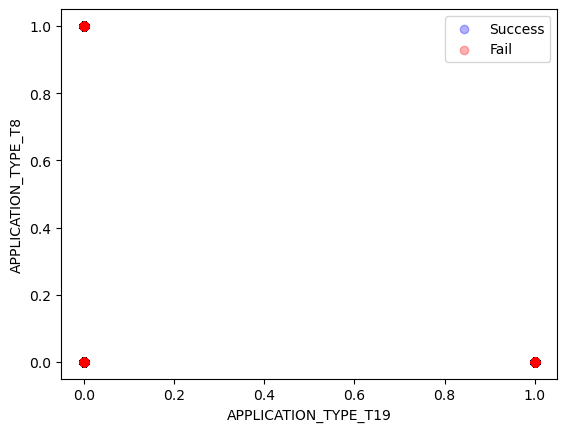

In [64]:
# Save the features names in a variable
features = X.columns

# Select the features to plot
x1 = 4
x2 = 10

# Create two dataframes for successful and failed campaigns
X_0 = concat_df.loc[concat_df['IS_SUCCESSFUL']==0,:].drop(columns='IS_SUCCESSFUL')
X_1 = concat_df.loc[concat_df['IS_SUCCESSFUL']==1,:].drop(columns='IS_SUCCESSFUL')

# Plot two features and their classification in a scatter plot
import matplotlib.pyplot as plt
plt.scatter(x = X_0[features[x1]], y = X_0[features[x2]], c='b', alpha=0.3)
plt.scatter(x = X_1[features[x1]], y = X_1[features[x2]], c='r', alpha=0.3)
plt.xlabel(features[x1])
plt.ylabel(features[x2])
plt.legend(['Success', 'Fail'])
plt.show()


In [11]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [31]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
n_features = len(X.columns)

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=10, activation="relu", input_dim=n_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=5, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                440       
                                                                 
 dense_4 (Dense)             (None, 5)                 55        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 501 (1.96 KB)
Trainable params: 501 (1.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [39]:
# Create a callback that saves the model's weights every five epochs
# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint
EPOCHS = 100
checkpoint_filepath = 'tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='accuracy',
    mode='max',
    save_best_only=True,
    save_freq=5)

In [40]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=EPOCHS, callbacks=[model_checkpoint_callback])

Epoch 1/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5736 - accuracy: 0.7210
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5599 - accuracy: 0.7292
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5562 - accuracy: 0.7303
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5539 - accuracy: 0.7316
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5529 - accuracy: 0.7312
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5523 - accuracy: 0.7323
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5515 - accuracy: 0.7317
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5508 - accuracy: 0.7324
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5505 - accuracy: 0.7330
Epoch 10/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5502 - accura

In [41]:
# The model weights (that are considered the best) are loaded
weights =  nn.load_weights(checkpoint_filepath)

In [46]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {100*model_loss:.2f}%, Accuracy: {100*model_accuracy:.2f}%")

268/268 - 0s - loss: 0.5528 - accuracy: 0.7234 - 213ms/epoch - 795us/step
Loss: 55.28%, Accuracy: 72.34%


In [47]:
# Export our model to HDF5 file
filename = 'AlphabetSoupCharity.h5'
pickle.dump(nn, open(filename, 'wb'))

# Open pickled model

In [4]:
loaded_model = pickle.load(open('AlphabetSoupCharity.h5', 'rb'))

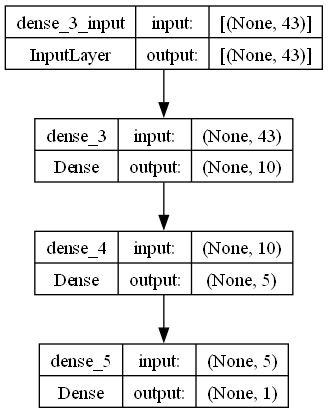

In [5]:
dot_img_file = 'img/model_1.png'
tf.keras.utils.plot_model(loaded_model, to_file=dot_img_file, show_shapes=True)